In [3]:
import numpy as np
import pandas as pd
import wrds
import psycopg2 


# Warren Buffet Data

In [2]:
from datetime import datetime
from datetime import datetime
import pandas_datareader.data as web
import pandas_datareader.data as web

start = datetime(YYYY, MM, DD)  # Replace YYYY, MM, DD with the desired start date

ds = web.DataReader('F-F_Research_Data_5_Factors_2x3_Daily', 'famafrench', start=start)
dff5 = ds[0]

ds = web.DataReader('F-F_Momentum_Factor_Daily', 'famafrench', start=start)
dmom = ds[0]

dff6 = dff5.merge(dmom, left_index=True, right_index=True, how='inner')
dff6e = dff6 / 100
ds = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench',start=start)
dff5=ds[0]

ds = web.DataReader('F-F_Momentum_Factor', 'famafrench',start=start)
dmom=ds[0]
dff6=dff5.merge(dmom,left_index=True,right_index=True,how='inner')
dff6e=dff6/100

<AxesSubplot:xlabel='date'>

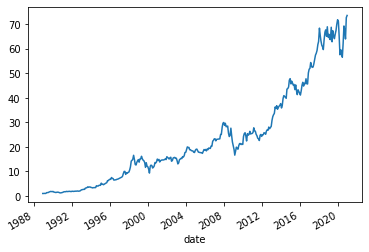

In [152]:
conn=wrds.Connection()
df=get_returns_daily(['BRK'],conn,'1/1/1960','1/1/2022',variable='ret')
dff6.to_timestamp('M')

df=(dff6.to_timestamp('M')).merge(df[17778.0],left_index=True,right_index=True,how='inner').dropna(how='any')
df.rename(columns={17778:'BRK'},inplace=True)
df.BRK=df.BRK-df.RF
df.to_pickle('../../data/df.pkl')

Start with the CAPM

In [136]:
import statsmodels.api as sm
temp=df.copy() 
x= sm.add_constant(temp['Mkt-RF'])
y= temp['BRK']
results= sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BRK   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     103.6
Date:                Tue, 04 May 2021   Prob (F-statistic):           1.06e-21
Time:                        09:25:48   Log-Likelihood:                 592.00
No. Observations:                 386   AIC:                            -1180.
Df Residuals:                     384   BIC:                            -1172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.003      2.210      0.028       0.001       0.011
Mkt-RF         0.6236      0.061     10.178      0.000       0.503       0.744
==============================================================================
Omnibus:                       83.751   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.498
Skew:                           0.974   Prob(JB):                     1.65e-57
Kurtosis:                       6.530   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
results.params[0]*12

0.07164885662375453

Market beta of about 0.6 and alpha of 7% per year!

*Six factor model*


In [138]:
temp=df.copy() 
x= sm.add_constant(temp.drop(['BRK','RF'],axis=1))
y= temp['BRK']
results= sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BRK   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     33.74
Date:                Tue, 04 May 2021   Prob (F-statistic):           1.35e-32
Time:                        09:26:02   Log-Likelihood:                 628.50
No. Observations:                 386   AIC:                            -1243.
Df Residuals:                     379   BIC:                            -1215.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0046      0.003      1.774      0.077      -0.001       0.010
Mkt-RF         0.7599      0.067     11.357      0.000       0.628       0.892
SMB           -0.3946      0.091     -4.316      0.000      -0.574      -0.215
HML            0.4836      0.118      4.091      0.000       0.251       0.716
RMW            0.2687      0.121      2.214      0.027       0.030       0.507
CMA           -0.1286      0.172     -0.749      0.454      -0.466       0.209
Mom           -0.0077      0.057     -0.135      0.892      -0.119       0.104
==============================================================================
Omnibus:                       89.527   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.376
Skew:                           1.105   Prob(JB):                     2.85e-52
Kurtosis:                       6.143   Cond. No.                         80.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
print(results.params[0]*12)

0.055415983696528254


* What do we learn about Warren Investment style?
* What do we learn about Warren specific stock picking skills?

**Aplication 2: Does Cathie Wood has some secret sauce? Performance evalaution of [ARKK](https://ark-funds.com/arkk)**

<AxesSubplot:xlabel='date'>

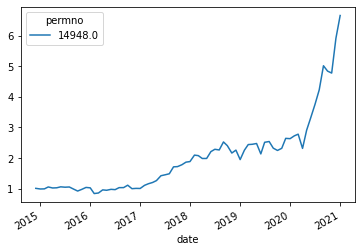

In [141]:
df=get_returns(['ARKK'],conn,'1/1/1960','1/1/2022',variable='ret')
(df+1).cumprod().plot()

In [142]:
df=(dff6/100).merge(df.to_period("M"),left_index=True,right_index=True,how='inner').dropna(how='any')
df.rename(columns={14948.0:'ARKK'},inplace=True)
df.ARKK=df.ARKK-df.RF

In [143]:
temp=df.copy() 
x= sm.add_constant(temp['Mkt-RF'])
y= temp['ARKK']
results= sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ARKK   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     160.9
Date:                Tue, 04 May 2021   Prob (F-statistic):           4.98e-20
Time:                        09:28:12   Log-Likelihood:                 120.93
No. Observations:                  74   AIC:                            -237.9
Df Residuals:                      72   BIC:                            -233.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0115      0.006      2.016      0.048       0.000       0.023
Mkt-RF         1.5768      0.124     12.684      0.000       1.329       1.825
==============================================================================
Omnibus:                        4.334   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                3.484
Skew:                           0.465   Prob(JB):                        0.175
Kurtosis:                       3.516   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
print(results.params[0]*12)

0.1385421007873513


In [145]:
temp=df.copy() 
x= sm.add_constant(temp.drop(['ARKK','RF'],axis=1))
y= temp['ARKK']
results= sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ARKK   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     50.21
Date:                Tue, 04 May 2021   Prob (F-statistic):           6.69e-23
Time:                        09:28:44   Log-Likelihood:                 140.55
No. Observations:                  74   AIC:                            -267.1
Df Residuals:                      67   BIC:                            -251.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0059      0.005      1.234      0.221      -0.004       0.015
Mkt-RF         1.3860      0.126     11.009      0.000       1.135       1.637
SMB            0.5065      0.210      2.410      0.019       0.087       0.926
HML           -0.8120      0.200     -4.067      0.000      -1.211      -0.413
RMW           -0.1642      0.326     -0.504      0.616      -0.815       0.487
CMA           -0.9219      0.351     -2.624      0.011      -1.623      -0.221
Mom           -0.2654      0.152     -1.747      0.085      -0.569       0.038
==============================================================================
Omnibus:                       10.376   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.331
Skew:                           0.806   Prob(JB):                      0.00571
Kurtosis:                       3.866   Cond. No.                         83.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
print(results.params[0]*12)

0.0704257048781867


* What do we learn about Cathie Wood investment style?

* What do we learn about Cathie Wook investment skills?

* How do you think about the R-squared? Is a large Rsquared good or bad in this case?

**Application 3: what is a good Momentum ETF?**

<AxesSubplot:xlabel='date'>

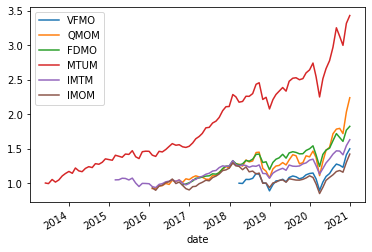

In [171]:
names=['VFMO','QMOM','FDMO','MTUM','IMTM','IMOM']
dmom=get_returns([names[0]],conn,'1/1/1960','1/1/2022')
for n in names[1:]:
    df=get_returns([n],conn,'1/1/1960','1/1/2022')
    dmom=dmom.merge(df,left_index=True,right_index=True,how='outer')
dmom.columns=names    
(dmom+1).cumprod().plot()

In [184]:

# lets merge
df=(dff6/100).merge(dmom.to_period("M"),left_index=True,right_index=True,how='inner')
# lets conver to excess returns
df[names]=df[names].subtract(df['RF'],axis=0)

In [180]:
temp.columns

Index(['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'Mom   ', 'VFMO', 'QMOM',
       'FDMO', 'MTUM', 'IMTM', 'IMOM'],
      dtype='object')

In [188]:
temp=df.copy() 
x= sm.add_constant(temp[['Mkt-RF','Mom   ']])
results=pd.DataFrame([],index=[],columns=names)
for n in names:
    y= temp[n]
    res= sm.OLS(y,x,missing='drop').fit()
    results.at['alpha',n]=res.params[0]
    results.at['t(alpha)',n]=res.tvalues[0]
    results.at['betamkt',n]=res.params[1]
    results.at['t(betamkt)',n]=res.tvalues[1]
    results.at['betamom',n]=res.params[2]
    results.at['t(betamom)',n]=res.tvalues[2]
    results.at['R-squared',n]=res.rsquared
    results.at['indio risk',n]=res.resid.std()*12**0.5
    results.at['sample size',n]=res.nobs
results

,VFMO,QMOM,FDMO,MTUM,IMTM,IMOM
alpha,-0.001458,-0.002718,-0.002354,0.001112,-0.002008,-0.005894
t(alpha),-0.430959,-0.63581,-1.664363,0.869311,-0.847557,-1.459713
betamkt,1.132283,1.39176,1.024135,1.00483,0.761741,0.958616
t(betamkt),16.762846,13.753471,31.996319,31.597999,13.558808,10.029335
betamom,0.186237,0.394746,0.254752,0.345416,0.09699,0.15187
t(betamom),2.178768,3.281823,6.461063,9.626601,1.568105,1.336749
R-squared,0.917845,0.782982,0.960205,0.919332,0.756383,0.674357
indio risk,0.064076,0.107838,0.032342,0.039782,0.065174,0.101857
sample size,34.0,60.0,51.0,92.0,71.0,60.0


* what do you conclude?

* Which ETF would you pick?

* How to think about the alpha here?

* How do you think about the R-squared? Is a large Rsquared good or bad in this case?

* How do you account for the differnece in market betas when investing?